# Scientific Programming Final Project

**Group E:**

Linnaeus Bundalian, Judith Osuna, David Cabezas, Martin Kusasira Morgan, Sofía González Estrada. 

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings

In [2]:
# Import functions from the SP_ETL_Functions file
from EDA.SP_ETL_Functions import *

In [3]:
# Load the Excel file into a DataFrame
data_file = 'EDA/data/parkinsons_data.csv'
df = pd.read_csv(data_file)

### Rename variables

In [4]:
# Dictionary of names
dict_names = {
    'name':'Name',
    'MDVP:Fo(Hz)': 'MDVP_Fo',
    'MDVP:Fhi(Hz)': 'MDVP_Fhi',
    'MDVP:Flo(Hz)': 'MDVP_Flo',
    'MDVP:Jitter(%)': 'MDVP_Jitter_percent',
    'MDVP:Jitter(Abs)': 'MDVP_Jitter_Abs',
    'MDVP:RAP': 'MDVP_RAP',
    'MDVP:PPQ': 'MDVP_PPQ',
    'Jitter:DDP': 'Jitter_DDP',
    'MDVP:Shimmer': 'MDVP_Shim',
    'MDVP:Shimmer(dB)': 'MDVP_Shim_dB',
    'Shimmer:APQ3': 'Shimmer_APQ3',
    'Shimmer:APQ5': 'Shimmer_APQ5',
    'MDVP:APQ': 'MDVP_APQ',
    'Shimmer:DDA': 'Shimmer_DDA',
    'NHR': 'NHR',
    'HNR': 'HNR',
    'status': 'Status',
    'RPDE': 'RPDE',
    'DFA': 'DFA',
    'spread1': 'Spread1',
    'spread2': 'Spread2',
    'D2': 'D2',
    'PPE': 'PPE'
}

# Apply the function to rename the columns
renamed_df = rename_variables(df, dict_names)

# View the result
print(renamed_df.columns)

Index(['Name', 'MDVP_Fo', 'MDVP_Fhi', 'MDVP_Flo', 'MDVP_Jitter_percent',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shim',
       'MDVP_Shim_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'Status', 'RPDE', 'DFA', 'Spread1',
       'Spread2', 'D2', 'PPE'],
      dtype='object')


### Detect null values

In [5]:
count_nulls(renamed_df)


Number of null values in the dataset:
 Name                   0
MDVP_Fo                0
MDVP_Fhi               0
MDVP_Flo               0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shim              0
MDVP_Shim_dB           0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
Status                 0
RPDE                   0
DFA                    0
Spread1                0
Spread2                0
D2                     0
PPE                    0
dtype: int64


### Handle outliers

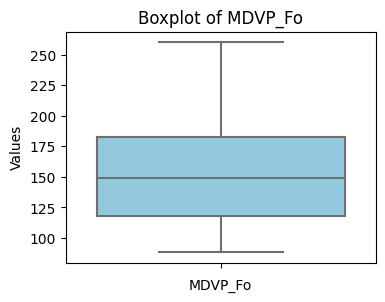

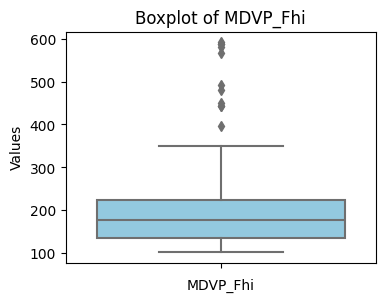

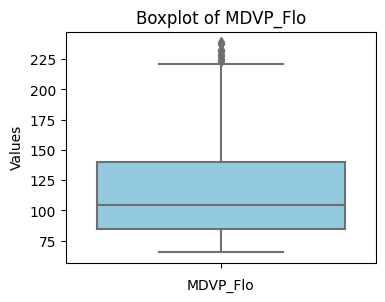

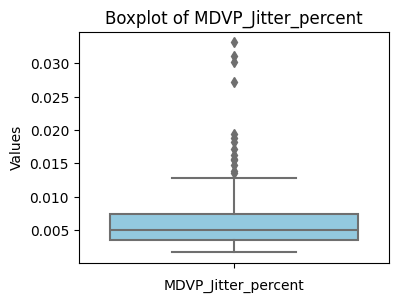

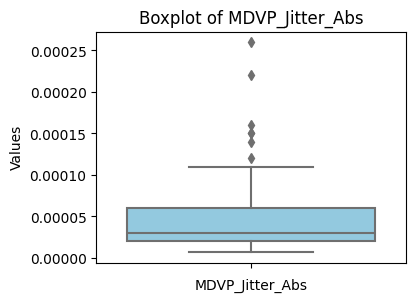

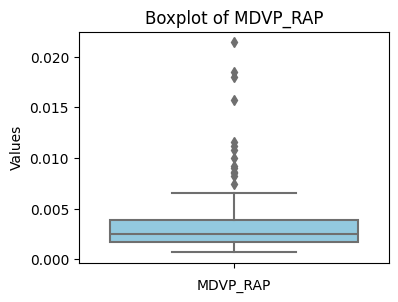

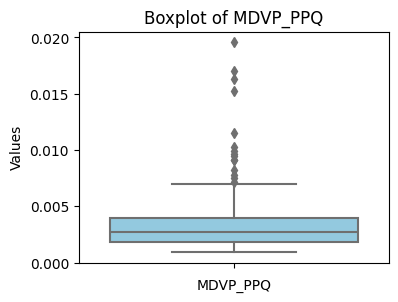

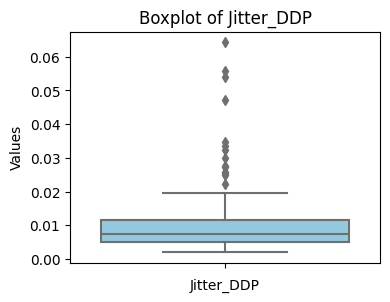

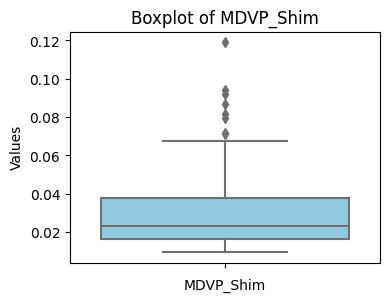

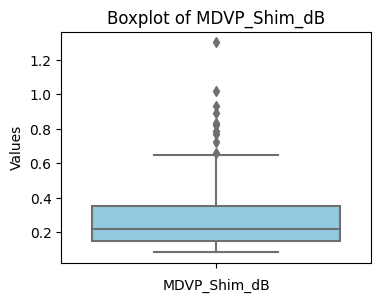

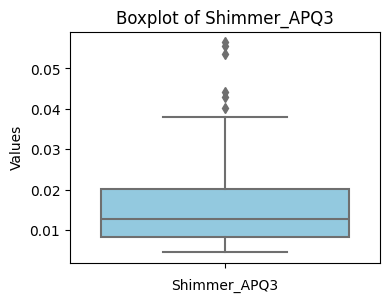

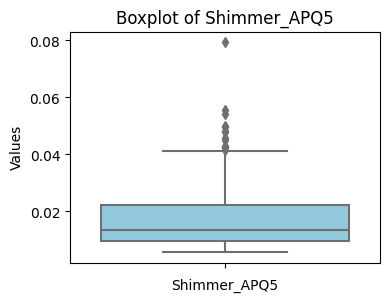

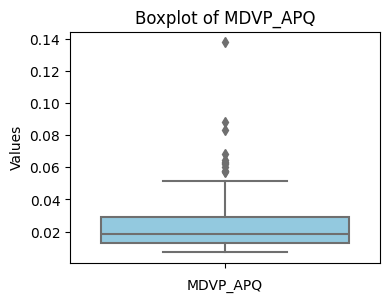

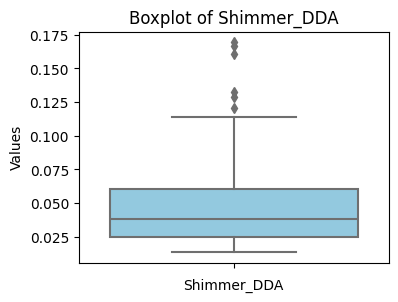

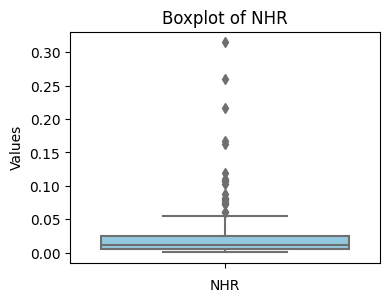

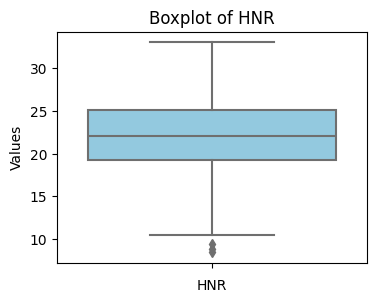

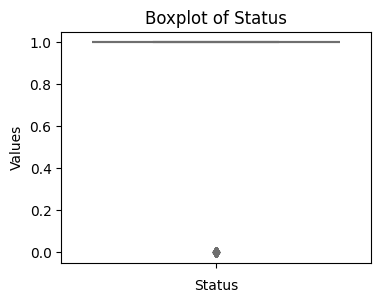

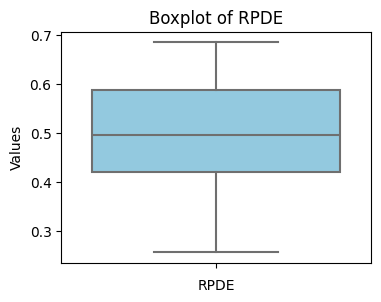

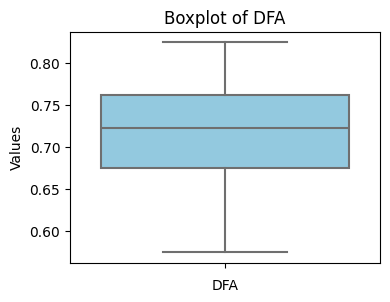

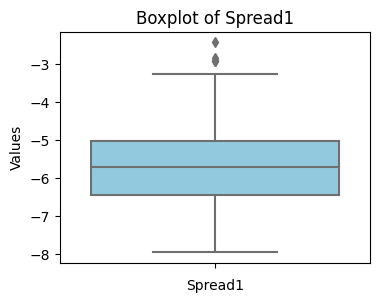

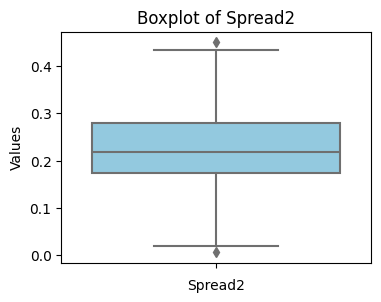

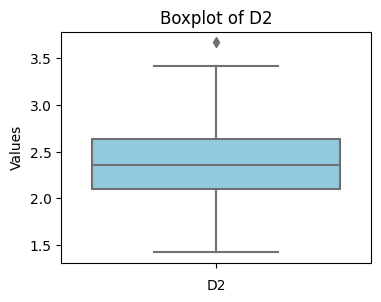

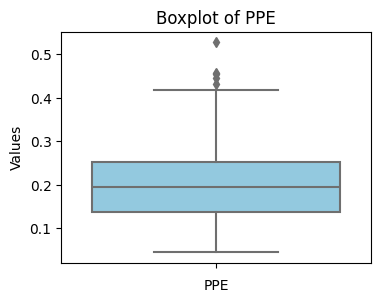

In [6]:
# Visualize outliers
generate_boxplots(renamed_df, None)

In [7]:
# Handle outliers
df_no_outliers = handle_outliers(renamed_df)


Number of outliers handled per column:
MDVP_Fo: 0
MDVP_Fhi: 11
MDVP_Flo: 9
MDVP_Jitter_percent: 14
MDVP_Jitter_Abs: 7
MDVP_RAP: 14
MDVP_PPQ: 15
Jitter_DDP: 14
MDVP_Shim: 8
MDVP_Shim_dB: 10
Shimmer_APQ3: 6
Shimmer_APQ5: 13
MDVP_APQ: 12
Shimmer_DDA: 6
NHR: 19
HNR: 3
RPDE: 0
DFA: 0
Spread1: 4
Spread2: 2
D2: 1
PPE: 5


C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


### Handle correlation between variables

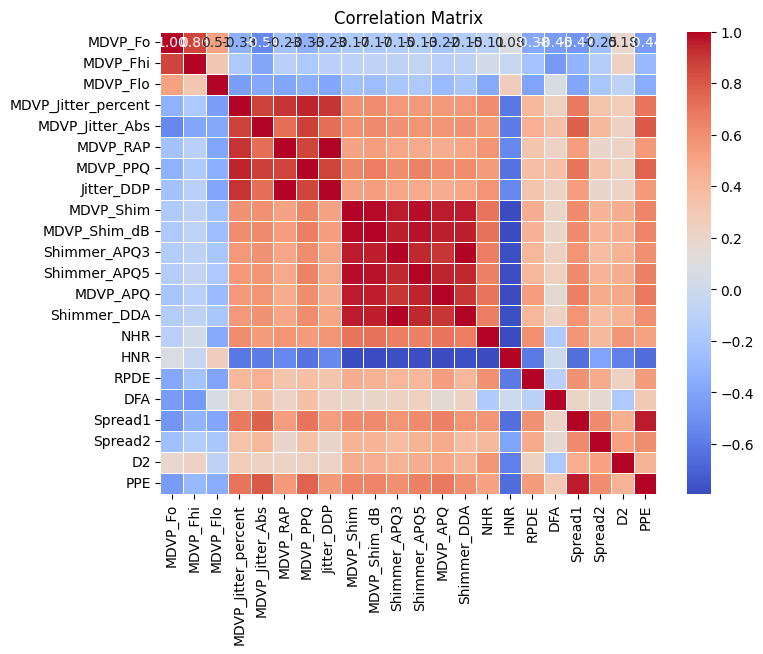


Highly correlated variables removed: {'MDVP_Shim', 'NHR', 'HNR', 'MDVP_Fhi', 'PPE', 'Shimmer_APQ3', 'MDVP_RAP', 'MDVP_Jitter_Abs', 'MDVP_Shim_dB', 'Shimmer_APQ5', 'Shimmer_DDA', 'MDVP_PPQ', 'MDVP_Jitter_percent', 'Jitter_DDP'}


In [8]:
df_no_corr = drop_correlated_vbles(df_no_outliers, 'Status', 0.75, True)

In [9]:
df_no_corr.head()

,Name,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,phon_R01_S01_1,119.992,74.997,0.02971,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,phon_R01_S01_2,122.400,113.819,0.04368,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,phon_R01_S01_3,116.682,111.555,0.03590,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,phon_R01_S01_4,116.676,111.366,0.03772,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,phon_R01_S01_5,116.014,110.655,0.04465,1,0.417356,0.823484,-3.747787,0.234513,2.332180


### Identify differences between controls and patients

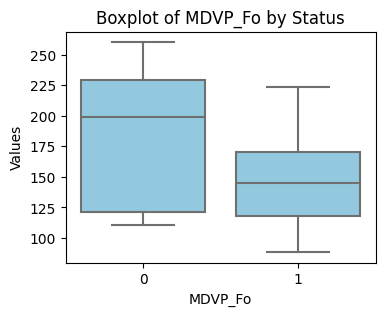

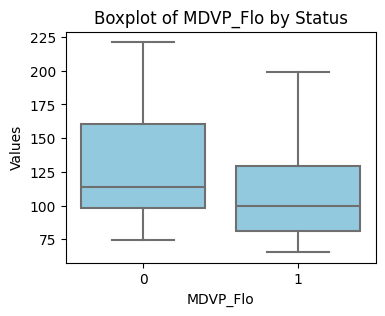

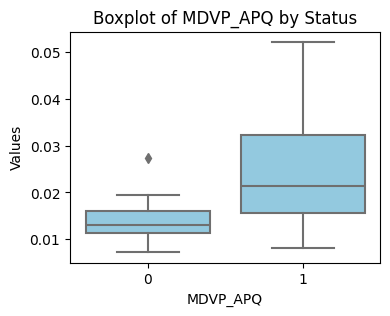

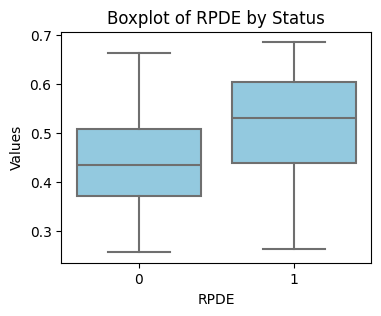

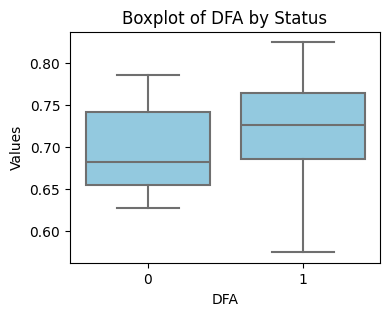

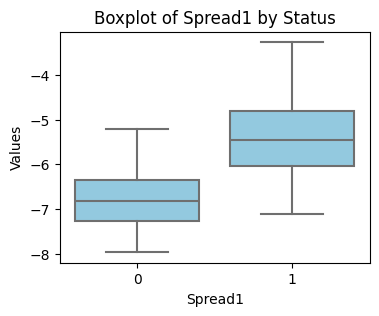

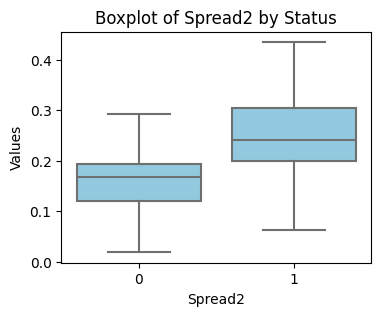

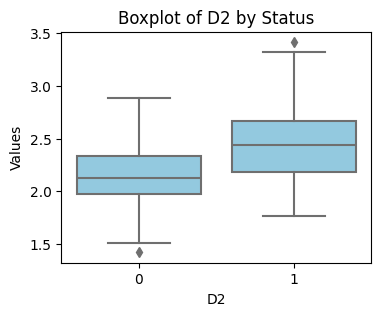

In [10]:
generate_boxplots(df_no_corr, 'Status')

### Analyze data summaries

In [11]:
# Show the summary of the data before and after
print("\nData summary before (original):\n")
print(renamed_df.describe())
print("\nData summary clean (no outliers or correlated variables):\n")
print(df_no_corr.describe())


Data summary before (original):

          MDVP_Fo    MDVP_Fhi    MDVP_Flo  MDVP_Jitter_percent  \
count  195.000000  195.000000  195.000000           195.000000   
mean   154.228641  197.104918  116.324631             0.006220   
std     41.390065   91.491548   43.521413             0.004848   
min     88.333000  102.145000   65.476000             0.001680   
25%    117.572000  134.862500   84.291000             0.003460   
50%    148.790000  175.829000  104.315000             0.004940   
75%    182.769000  224.205500  140.018500             0.007365   
max    260.105000  592.030000  239.170000             0.033160   

       MDVP_Jitter_Abs    MDVP_RAP    MDVP_PPQ  Jitter_DDP   MDVP_Shim  \
count       195.000000  195.000000  195.000000  195.000000  195.000000   
mean          0.000044    0.003306    0.003446    0.009920    0.029709   
std           0.000035    0.002968    0.002759    0.008903    0.018857   
min           0.000007    0.000680    0.000920    0.002040    0.009540   
2

### Group by subject

In [12]:
grouped_df = group_and_average(df_no_corr)

Number of rows in the new df: 32
Number of unique subjects in the new df: 32


In [13]:
grouped_df.head()

,Subject_ID,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,S01,118.719333,106.029833,0.037348,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642
1,S02,99.770333,95.413167,0.018123,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428
2,S04,147.346167,87.532333,0.018410,1.0,0.521660,0.645843,-5.703884,0.249288,2.360638
3,S05,159.837667,86.767167,0.042770,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869
4,S06,150.644667,78.278333,0.020725,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360


### Scatter plot

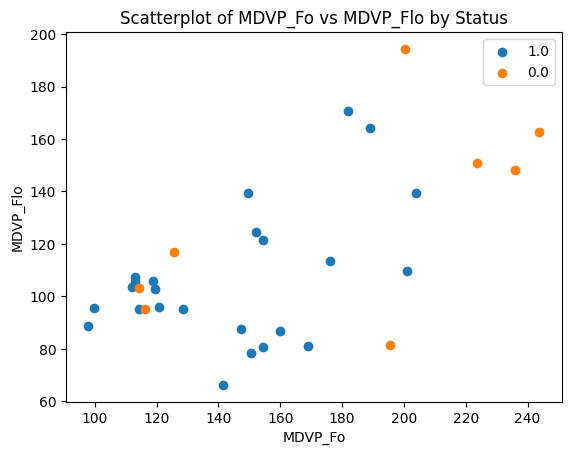

In [14]:
scatter_plot(grouped_df, var1='MDVP_Fo', var2='MDVP_Flo', groups='Status')

### Normalize data

In [15]:
# Apply the normalization function
normalized_df = normalize_dataframe(grouped_df, method='z-score', exclude_columns=['Subject_ID', 'Status'])

In [16]:
normalized_df.head()

,Subject_ID,MDVP_Fo,MDVP_Flo,MDVP_APQ,Status,RPDE,DFA,Spread1,Spread2,D2
0,S01,-0.871842,-0.224648,1.569731,1.0,-0.738285,1.953532,1.656460,1.090130,-0.087239
1,S02,-1.341992,-0.573270,-0.371677,1.0,1.064727,1.134122,0.351705,1.263135,-0.268054
2,S04,-0.161571,-0.832054,-0.342728,1.0,0.250237,-1.367303,0.038395,0.371913,-0.028304
3,S05,0.148360,-0.857180,2.117197,1.0,1.364914,-0.420238,1.301646,0.812897,1.370811
4,S06,-0.079731,-1.135929,-0.108951,1.0,-0.693344,0.029986,-0.535961,0.054825,0.232772
